In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [13]:
#collecting and storing images and labeles in lists.
data = []
labels = []
classes = 43
cur_path = "i:\\class\\Term3\\BDM3035\\Project\\"

for i in range(classes):
    path = os.path.join(cur_path,'Train',str(i))
    images =  os.listdir(path)

    for a in images:
        try:
            image = Image.open(path+'\\'+a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

data = np.array(data)
labels = np.array(labels)


In [14]:
data
print("-------------------------------")
labels

-------------------------------


array([ 0,  0,  0, ..., 42, 42, 42])

Data shape: (21500, 30, 30, 3)
Labels shape: (21500,)


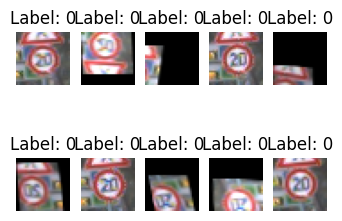

In [15]:
#1...validation of resizing of images

# Check sizes of data and labels
print("Data shape:", data.shape)
print("Labels shape:", labels.shape)

# Visualize a few images along with their labels
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5, figsize=(4,3))
for i, ax in enumerate(axes.flat):
    ax.imshow(data[i])
    ax.set_title(f"Label: {labels[i]}")
    ax.axis('off')

plt.show()

In [16]:
#train test split of images

from keras.utils import to_categorical
print("\n",data.shape, labels.shape)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print("\n",X_train.shape, X_test.shape, y_train.shape, y_test.shape)
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)


 (21500, 30, 30, 3) (21500,)

 (17200, 30, 30, 3) (4300, 30, 30, 3) (17200,) (4300,)


In [17]:
# Create a Sequential model
TSRModel = Sequential()

# Add layers to the model
TSRModel.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
TSRModel.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
TSRModel.add(MaxPool2D(pool_size=(2, 2)))
TSRModel.add(Dropout(rate=0.25))
TSRModel.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
TSRModel.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
TSRModel.add(MaxPool2D(pool_size=(2, 2)))
TSRModel.add(Dropout(rate=0.25))
TSRModel.add(Flatten())
TSRModel.add(Dense(256, activation='relu'))
TSRModel.add(Dropout(rate=0.5))
TSRModel.add(Dense(43, activation='softmax'))

# Compilation of the model
TSRModel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
# Number of epochs for training
epochs = 25

# Train the model
history = TSRModel.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/25
269/269 [==============================] - 15s 52ms/step - loss: 3.9931 - accuracy: 0.1328 - val_loss: 1.9701 - val_accuracy: 0.4870
Epoch 2/25
269/269 [==============================] - 14s 53ms/step - loss: 1.8440 - accuracy: 0.5137 - val_loss: 1.2033 - val_accuracy: 0.7237
Epoch 3/25
269/269 [==============================] - 14s 52ms/step - loss: 1.3003 - accuracy: 0.6540 - val_loss: 0.8233 - val_accuracy: 0.7835
Epoch 4/25
269/269 [==============================] - 16s 61ms/step - loss: 1.0318 - accuracy: 0.7181 - val_loss: 0.6544 - val_accuracy: 0.8270
Epoch 5/25
269/269 [==============================] - 15s 54ms/step - loss: 0.9046 - accuracy: 0.7510 - val_loss: 0.5720 - val_accuracy: 0.8395
Epoch 6/25
269/269 [==============================] - 14s 52ms/step - loss: 0.8169 - accuracy: 0.7718 - val_loss: 0.5422 - val_accuracy: 0.8449
Epoch 7/25
269/269 [==============================] - 14s 51ms/step - loss: 0.7353 - accuracy: 0.7884 - val_loss: 0.5169 - val_accuracy:

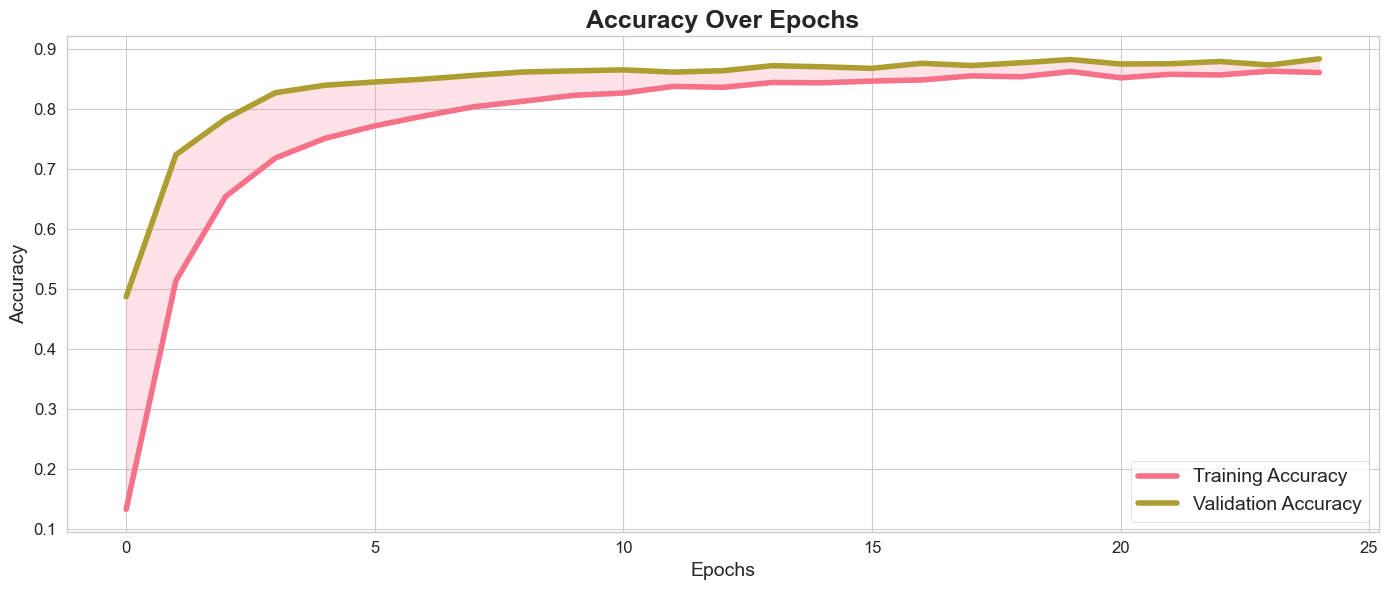

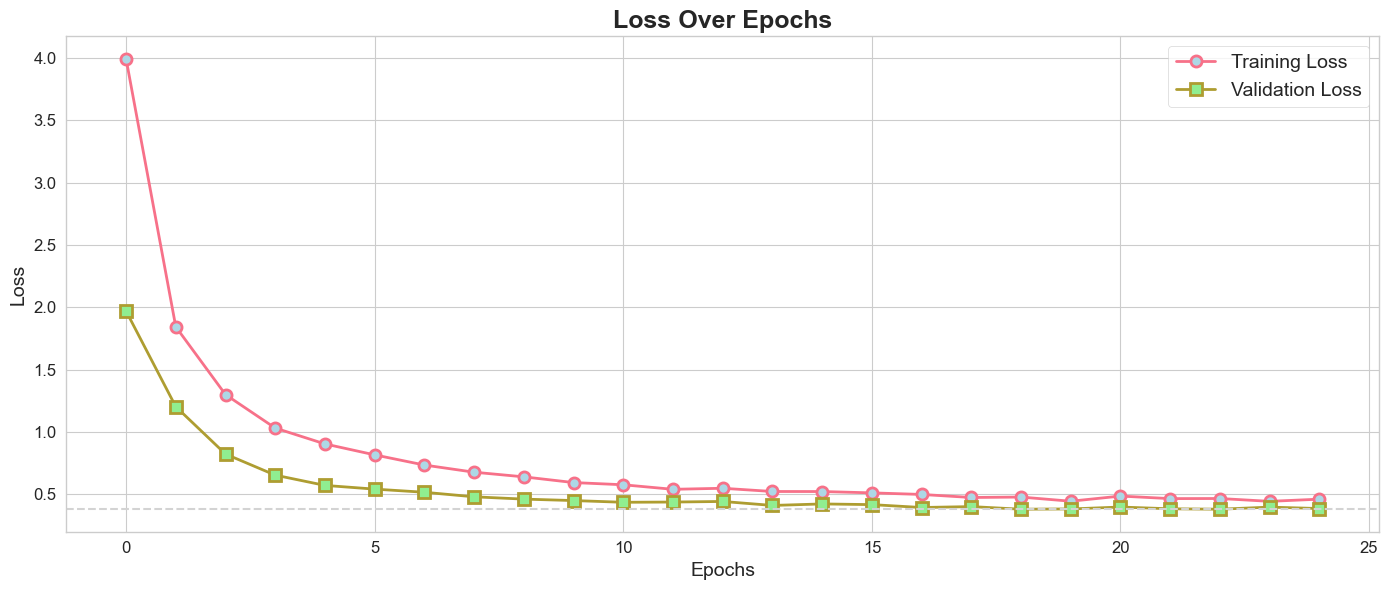

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
 
# Set a visually appealing style
sns.set_style('whitegrid')  # Clean background with gridlines
 
# Employ a vibrant color palette
colors = sns.color_palette('husl', 5)[:2]  # Select first two colors from a rich palette
 
# Plot accuracy with a smooth curve and shaded confidence region
plt.figure(figsize=(14, 6))  # Larger figure size
plt.plot(history.history['accuracy'], label='Training Accuracy', color=colors[0], linewidth=4)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color=colors[1], linewidth=4)
plt.fill_between(range(len(history.history['accuracy'])), history.history['accuracy'], history.history['val_accuracy'], alpha=0.2, color=colors[0])  # Shaded confidence region
plt.title('Accuracy Over Epochs', fontsize=18, fontweight='bold')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
 
# Plot loss with a semi-transparent background and enhanced markers
plt.figure(figsize=(14, 6))
plt.plot(history.history['loss'], label='Training Loss', color=colors[0], linewidth=2, marker='o', markersize=8, markerfacecolor='lightblue', markeredgewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', color=colors[1], linewidth=2, marker='s', markersize=8, markerfacecolor='lightgreen', markeredgewidth=2)
plt.axhline(y=min(history.history['val_loss']), color='lightgray', linestyle='--', linewidth=1.5)  # Highlight minimum validation loss
plt.title('Loss Over Epochs', fontsize=18, fontweight='bold')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
 
plt.show()